# Exploration

In [5]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [6]:
#definitions for automatic visualisation

def twodimheatmap(data,z,c,**kwargs):
    '''
    2D-heatmap in the X,Y-plane of the defined channel and Z-coordinate.
    '''
    data = data[:,:,z,c]
    if 'ax' not in kwargs.keys():
        fig,ax = plt.subplots(figsize=(7,7))
    else:
        ax = kwargs['ax']
        
    im = ax.imshow(data)


In [7]:
#setting variables

hdf5_path = 'data/dataset.hdf5'
sample = 1234

In [8]:
#characteristics hdf5-file and data

with h5py.File(hdf5_path) as file:
    print('> KEYS: \t', file.keys())
    print('> SHAPE: \t', file['train_data'].shape)
    train_sample = file['train_data'][sample,:,:,:,:]

> KEYS: 	 <KeysViewHDF5 ['test_data', 'test_labels', 'train_data', 'train_labels']>
> SHAPE: 	 (25600, 32, 32, 32, 3)


In [9]:
#characteristics of 1 simulation
#3D-image with 3 channels of return

print('> SHAPE SIMULATION: ', train_sample.shape)

> SHAPE SIMULATION:  (32, 32, 32, 3)


In [10]:
# shape of 1 spatial dimension in 1 channel => 1D vector

print(train_sample[0,:,0,0])

[1.34586e+00 5.48043e-01 1.21792e+00 1.34504e+00 1.18590e+00 1.54448e+00
 4.47703e-01 5.75599e-01 1.97863e-01 6.35235e+00 4.04947e+00 3.45637e-03
 1.89887e+00 5.46655e-01 1.54108e+00 1.49749e+00 4.76673e+00 0.00000e+00
 1.02135e+01 9.60352e-01 1.21878e+00 2.91667e+00 4.26753e+00 3.23211e-01
 5.53189e-01 9.01263e-02 1.78479e+00 3.77828e+00 5.06026e-03 1.72240e-01
 1.87280e+00 1.36820e+00]


## Mapping and substraction

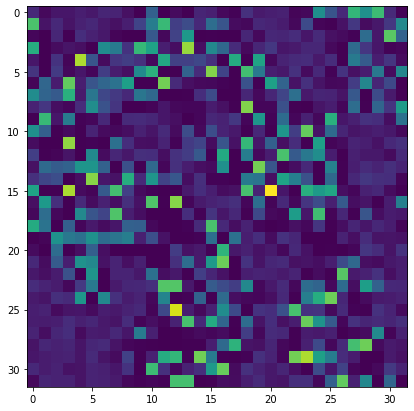

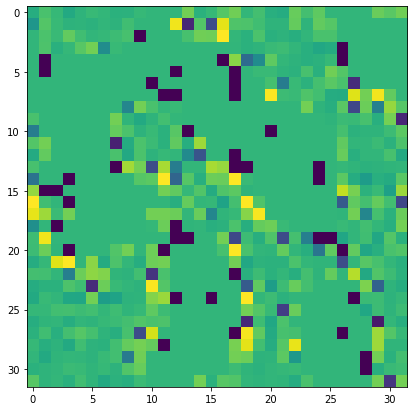

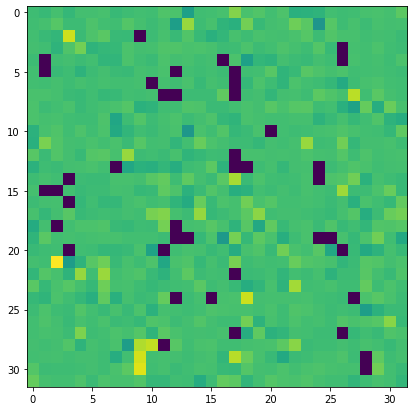

In [11]:
#same plane, different channels
for x in range(3):
    twodimheatmap(train_sample,5,x)

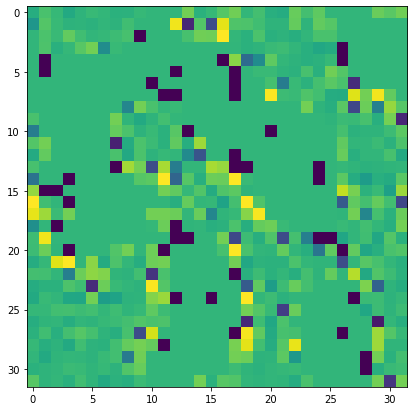

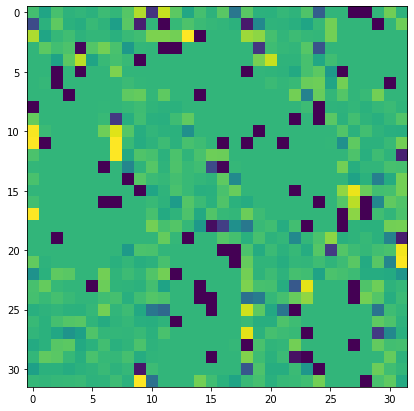

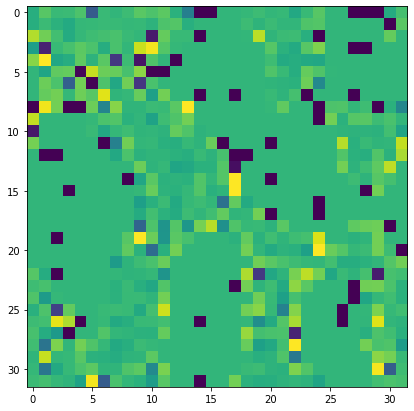

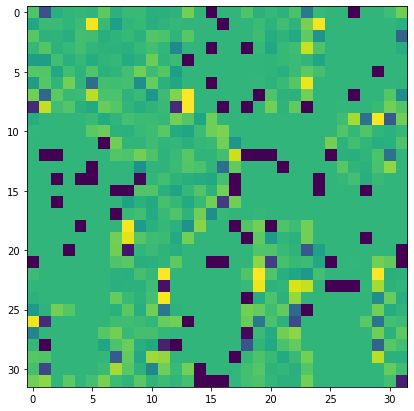

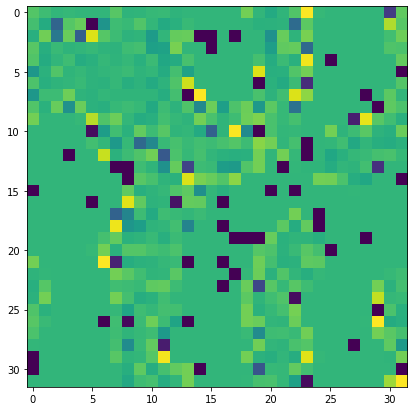

In [12]:
#same channel, different planes
for x in range(5,10):
    twodimheatmap(train_sample,x,1)

In [13]:
train_sample[:,:,2,1]

array([[0.687595, 0.652343, 0.646464, ..., 0.65625 , 0.65625 , 0.625604],
       [0.488173, 0.69728 , 0.673336, ..., 0.65625 , 0.65625 , 0.661415],
       [0.667396, 0.989249, 0.728511, ..., 0.65625 , 0.65625 , 0.65625 ],
       ...,
       [0.640529, 0.651732, 0.672604, ..., 0.65625 , 0.660939, 0.980835],
       [0.625773, 0.689406, 0.638288, ..., 0.65625 , 0.      , 0.753994],
       [0.688081, 0.659448, 0.665841, ..., 0.65625 , 0.65625 , 0.676949]],
      dtype=float32)

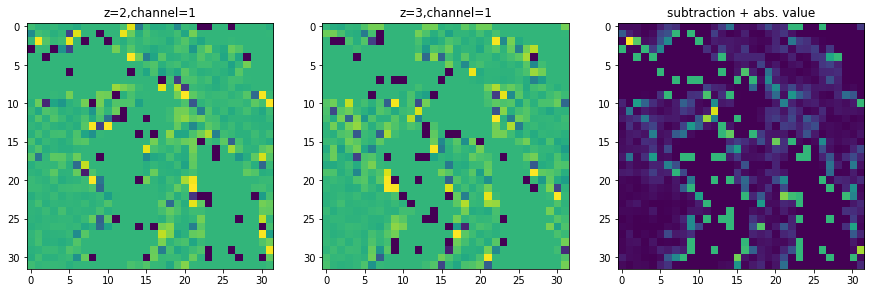

In [14]:
#deviations from zero => not similar
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,10))
twodimheatmap(train_sample,2,1,ax=ax1)
twodimheatmap(train_sample,3,1,ax=ax2)

ax3.imshow(np.absolute(np.subtract(train_sample[:,:,2,1],train_sample[:,:,3,1])))

ax1.set_title('z=2,channel=1')
ax2.set_title('z=3,channel=1')
ax3.set_title('subtraction + abs. value')

plt.show()

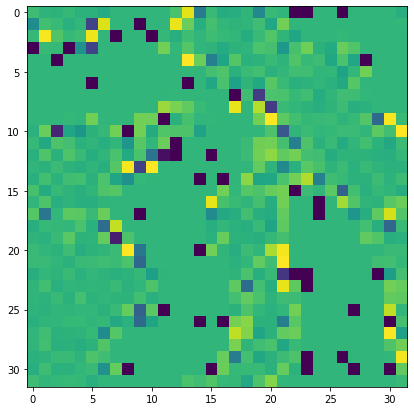

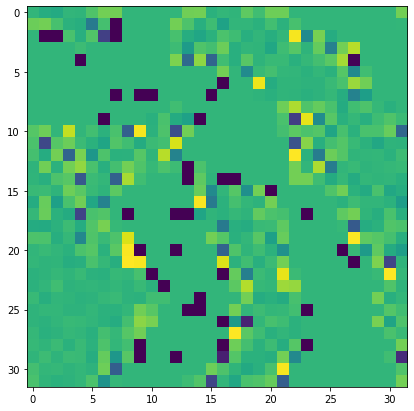

In [15]:
twodimheatmap(train_sample,2,1)
twodimheatmap(train_sample,3,1)

## Counts and value comparison

In [16]:
def valuecounts(c,**kwargs):
    '''
    barplot of the different values in the matrix. Should give an idea about the distribution.
    Takes a channel in the 3D-space
    '''
    data=train_sample[:,:,:,c].flatten()
    
    if 'ax' not in kwargs.keys():
        fig,ax = plt.subplots()
    else:
        ax = kwargs['ax']
        
    minimum = data.min()
    maximum = data.max()
    ticks = np.linspace(minimum,maximum,5)
    
    ax.bar(ticks,height=data)

In [17]:
train_sample[:,:,:,1].flatten().max()

1.0

In [18]:
x = np.linspace(0,1,20)

In [19]:
fig,ax=plt.subplots()

data = train_sample[:,:,:1]
data = data.flatten()

minimum = data.min()
maximum = data.max()
ticks = np.linspace(minimum,maximum,5)

counts = 


SyntaxError: invalid syntax (<ipython-input-19-32d4a65f8d15>, line 10)